In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Data.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,Unnamed: 0,Sales Document,Billing Document Date,Customer Category,Description,Location,Region,Description IV,Equipment,Description VII,Remarks,Billing Amount incl. Tax in LC,Billing Quantity
0,100992,65027051,2024-04-25 00:00:00,PSU Bank,State Bank of India,Zunheboto,Nagaland,#GS-Service Contract,10078379,>>>DO NOT USE<<< BPS C4,AMC,-27209.34,-1
1,9951,45451729,2024-02-27 00:00:00,Private Bank,Utkarsh Small Finance Bank Ltd,Zirakpur,Punjab,CM-Pronote,#,SYSTEM PRONOTE 1.5F PC DIS,Pronote,68000.00,1
2,9953,45451729,2024-02-27 00:00:00,Private Bank,Utkarsh Small Finance Bank Ltd,Zirakpur,Punjab,CM-Pronote,#,"MAINS CABLE IND 250V 1,8m",Spare parts,0.00,1
3,9954,45451729,2024-02-27 00:00:00,Private Bank,Utkarsh Small Finance Bank Ltd,Zirakpur,Punjab,CM-Pronote,#,LED-DISPLAY WX-116 PN-1S,Display,0.00,1
4,19070,75068148,2024-05-28 00:00:00,Private Bank,IDBI Bank Ltd,Zirakpur,Punjab,#GS-Service Contract,10172796,>>>DO NOT USE<<< BPS-C1,AMC,7762.75,1


In [40]:
df["Sales_Lakh"] = df["Billing Amount incl. Tax in LC"] / 1e5    #conversion to lakhs

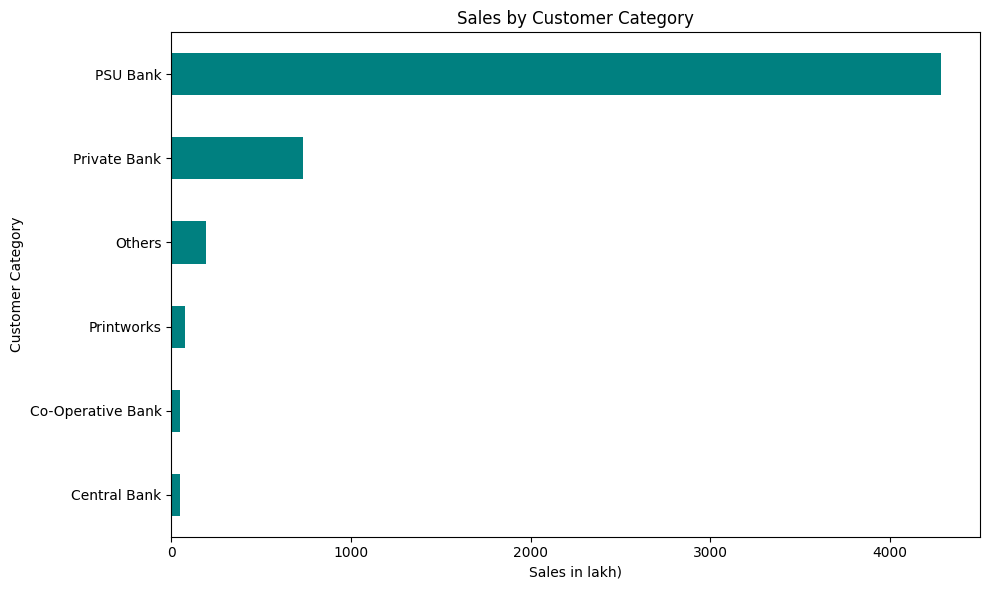

In [44]:
import matplotlib.pyplot as plt

category_sales = df.groupby('Customer Category')['Sales_Lakh'].sum().sort_values()

plt.figure(figsize=(10, 6))
category_sales.plot(kind='barh', color='teal')
plt.xlabel("Sales in lakh)")
plt.title("Sales by Customer Category")
plt.tight_layout()
plt.show()


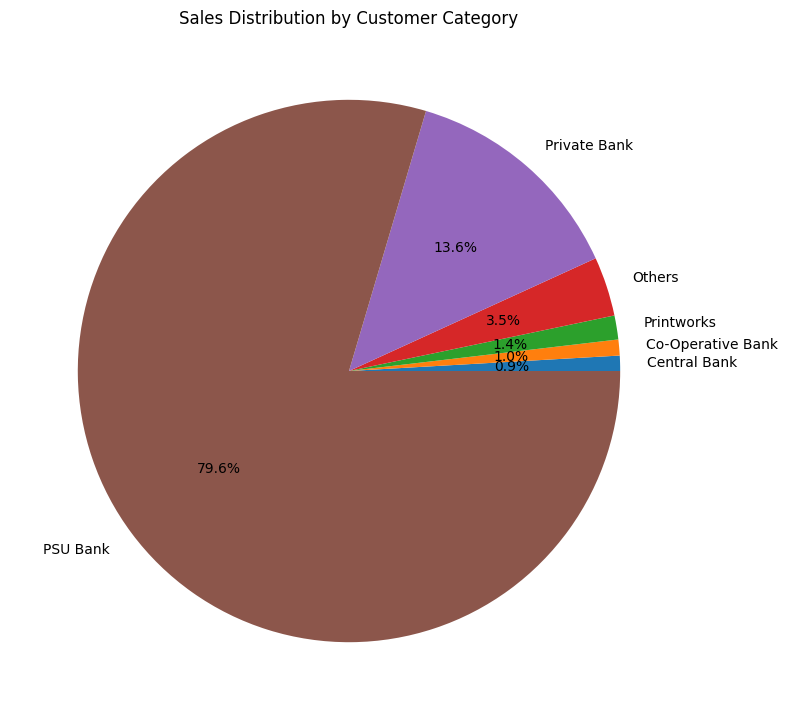

In [45]:
cat_sales = df.groupby("Customer Category")["Sales_Lakh"].sum().sort_values()

# Pie Chart
plt.figure(figsize=(8, 8))
cat_sales.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel('')
plt.title("Sales Distribution by Customer Category")
plt.tight_layout()
plt.show()

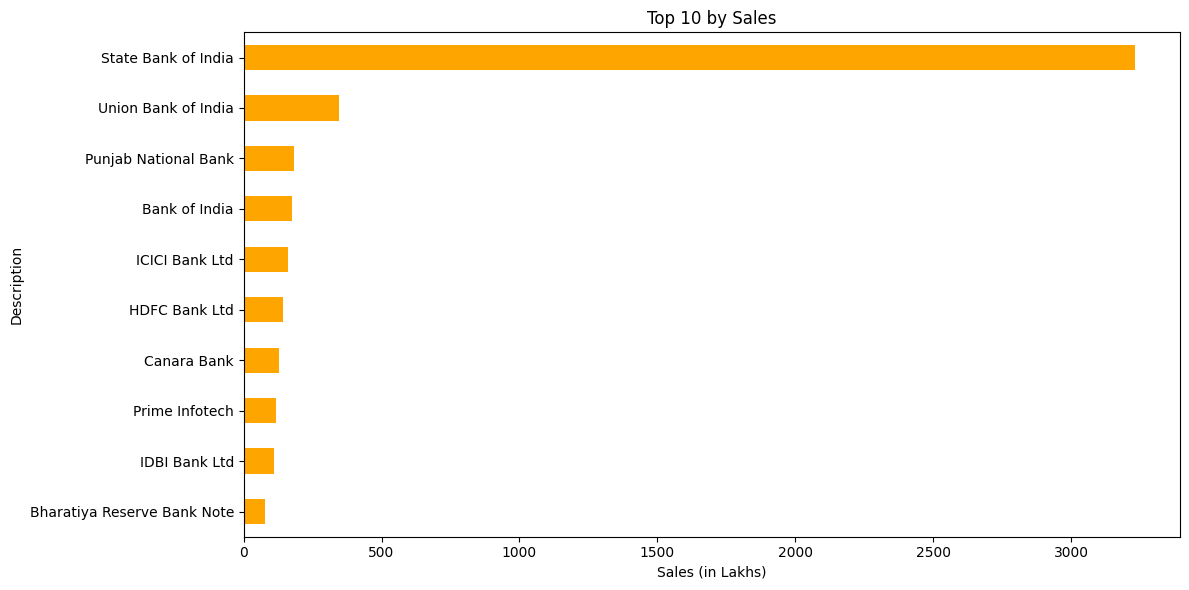

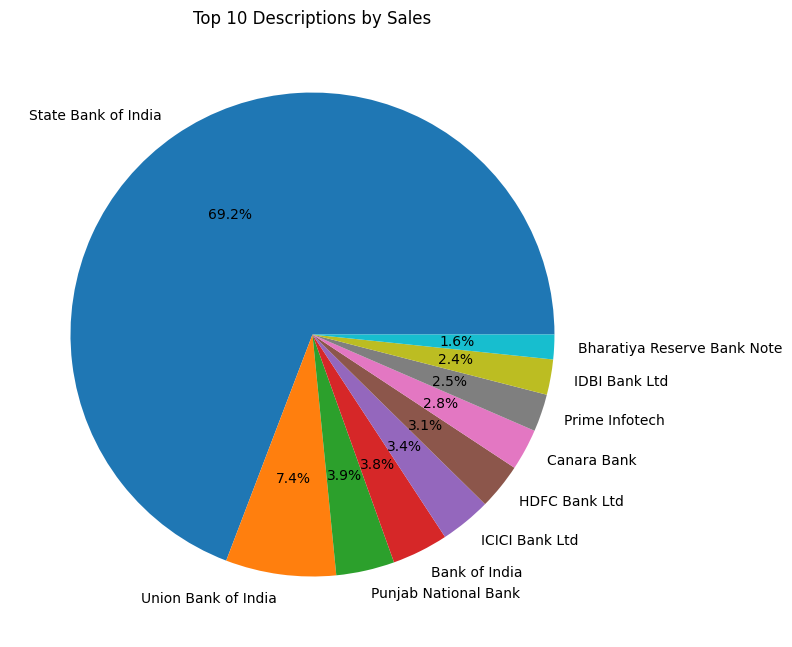

In [52]:
desc_sales = df.groupby("Description")["Sales_Lakh"].sum().sort_values(ascending=False).head(10)

# Bar Chart
plt.figure(figsize=(12, 6))
desc_sales.sort_values().plot(kind="barh", color="orange")
plt.xlabel("Sales (in Lakhs)")
plt.title("Top 10 by Sales")
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
desc_sales.plot(kind="pie", autopct='%1.1f%%')
plt.title("Top 10 Descriptions by Sales")
plt.ylabel('')
plt.tight_layout()
plt.show()


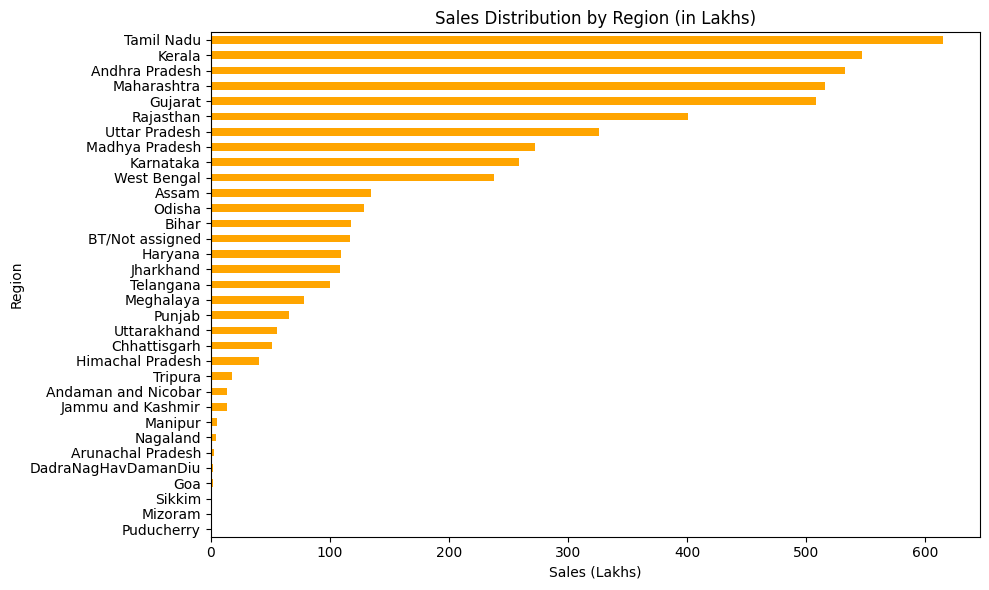

In [49]:
region_sales = df.groupby("Region")["Sales_Lakh"].sum().sort_values()

region_sales.plot(kind="barh", color="orange", figsize=(10, 6))
plt.title("Sales Distribution by Region (in Lakhs)")
plt.xlabel("Sales (Lakhs)")
plt.tight_layout()
plt.show()

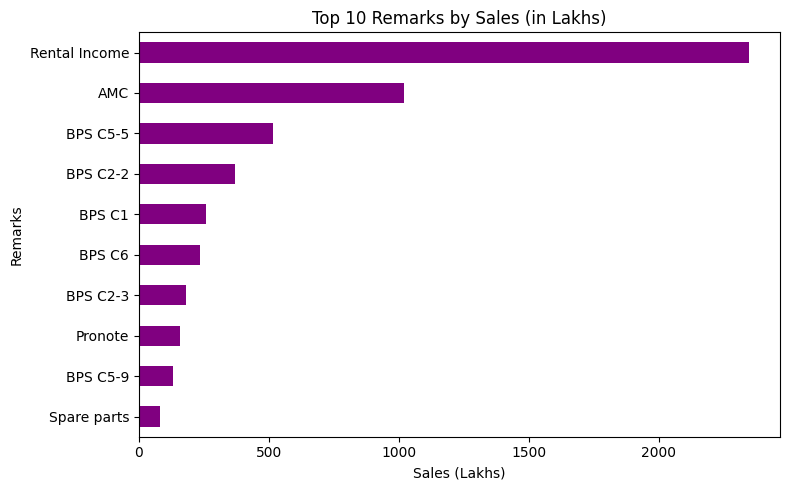

In [50]:
remark_sales = df.groupby("Remarks")["Sales_Lakh"].sum().sort_values(ascending=False).head(10)

remark_sales.sort_values().plot(kind="barh", color="purple", figsize=(8, 5))
plt.title("Top 10 Remarks by Sales (in Lakhs)")
plt.xlabel("Sales (Lakhs)")
plt.tight_layout()
plt.show()


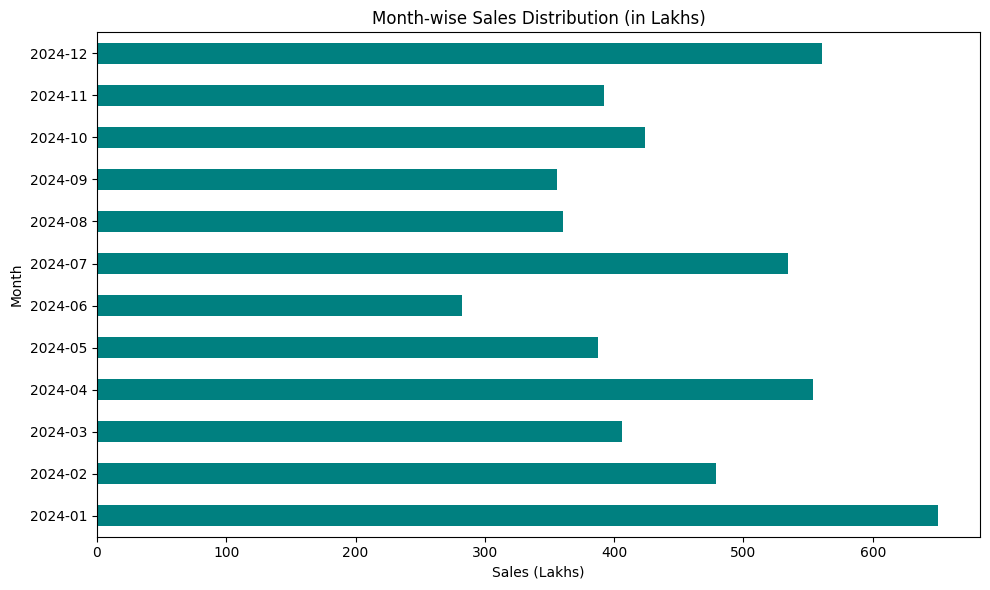

In [ ]:

df["Billing Document Date"] = pd.to_datetime(df["Billing Document Date"])
df["Month"] = df["Billing Document Date"].dt.to_period("M").astype(str)

month_sales = df.groupby("Month")["Sales_Lakh"].sum().sort_index()

month_sales.plot(kind="barh", color="teal", figsize=(10, 6))
plt.title("Month-wise Sales Distribution (in Lakhs)")
plt.xlabel("Sales (Lakhs)")
plt.tight_layout()
plt.show()
